In [8]:
import numpy as np
import numpy.linalg as la

verySmallNumber = 1e-14 # That's 1×10⁻¹⁴ = 0.00000000000001

# Our first function will perform the Gram-Schmidt procedure for 4 basis vectors.
# We'll take this list of vectors as the columns of a matrix, A.
# We'll then go through the vectors one at a time and set them to be orthogonal
# to all the vectors that came before it. Before normalising.
# Follow the instructions inside the function at each comment.
# You will be told where to add code to complete the function.
def gsBasis4(A) :
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # The zeroth column is easy, since it has no other vectors to make it normal to.
    # All that needs to be done is to normalise it. I.e. divide by its modulus, or norm.
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])
    # For the first column, we need to subtract any overlap with our new zeroth vector.
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]
    # If there's anything left after that subtraction, then B[:, 1] is linearly independant of B[:, 0]
    # If this is the case, we can normalise it. Otherwise we'll set that vector to zero.
    if la.norm(B[:, 1]) > verySmallNumber :
        B[:, 1] = B[:, 1] / la.norm(B[:, 1])
    else :
        B[:, 1] = np.zeros_like(B[:, 1])
    # Now we need to repeat the process for column 2.
    # Insert two lines of code, the first to subtract the overlap with the zeroth vector,
    # and the second to subtract the overlap with the first.
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 0] * B[:, 0]
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 1] * B[:, 1]
    
    # Again we'll need to normalise our new vector.
    # Copy and adapt the normalisation fragment from above to column 2.
    if la.norm(B[:, 2]) > verySmallNumber :
        B[:, 2] = B[:, 2] / la.norm(B[:, 2])
    else :
        B[:, 2] = np.zeros_like(B[:, 2])
    
    # Finally, column three:
    # Insert code to subtract the overlap with the first three vectors.
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 0] * B[:, 0]
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 1] * B[:, 1]
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 2] * B[:, 2]
    
    # Now normalise if possible
    if la.norm(B[:, 3]) > verySmallNumber :
        B[:, 3] = B[:, 3] / la.norm(B[:, 3])
    else :
        B[:, 3] = np.zeros_like(B[:, 3])
    
    # Finally, we return the result:
    return B

# The second part of this exercise will generalise the procedure.
# Previously, we could only have four vectors, and there was a lot of repeating in the code.
# We'll use a for-loop here to iterate the process for each vector.
def gsBasis(A) :
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # Loop over all vectors, starting with zero, label them with i
    for i in range(B.shape[1]) :
        # Inside that loop, loop over all previous vectors, j, to subtract.
        for j in range(i) :
            # Complete the code to subtract the overlap with previous vectors.
            # you'll need the current vector B[:, i] and a previous vector B[:, j]
            B[:, i] = B[:, i] - B[:, i] @ B[:, j] * B[:, j]
        # Next insert code to do the normalisation test for B[:, i]
        if la.norm(B[:, i]) > verySmallNumber:
            B[:, i] = B[:, i] / la.norm(B[:, i])
        else:
            B[:, i] = np.zeros_like(B[:, i])
            
    # Finally, we return the result:
    return B

# This function uses the Gram-schmidt process to calculate the dimension
# spanned by a list of vectors.
# Since each vector is normalised to one, or is zero,
# the sum of all the norms will be the dimension.
def dimensions(A) :
    return np.sum(la.norm(gsBasis(A), axis=0))


V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)
gsBasis4(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [9]:
U = gsBasis4(V)
gsBasis4(U)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [10]:
gsBasis(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [11]:
import numpy as np
import numpy.linalg as la

verySmallNumber = 1e-14 # That's 1×10⁻¹⁴ = 0.00000000000001

# Our first function will perform the Gram-Schmidt procedure for 4 basis vectors.
# We'll take this list of vectors as the columns of a matrix, A.
# We'll then go through the vectors one at a time and set them to be orthogonal
# to all the vectors that came before it. Before normalising.
# Follow the instructions inside the function at each comment.
# You will be told where to add code to complete the function.
def gsBasis4(A) :
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # The zeroth column is easy, since it has no other vectors to make it normal to.
    # All that needs to be done is to normalise it. I.e. divide by its modulus, or norm.
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])
    # For the first column, we need to subtract any overlap with our new zeroth vector.
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]
    # If there's anything left after that subtraction, then B[:, 1] is linearly independant of B[:, 0]
    # If this is the case, we can normalise it. Otherwise we'll set that vector to zero.
    if la.norm(B[:, 1]) > verySmallNumber :
        B[:, 1] = B[:, 1] / la.norm(B[:, 1])
    else :
        B[:, 1] = np.zeros_like(B[:, 1])
    B[:,2] = B[:,2] - B[:, 2] @ B[:, 0] * B[:, 0]
    B[:,2] = B[:,2] - B[:, 2] @ B[:, 1] * B[:, 1]
    if la.norm(B[:,2]) > verySmallNumber :
        B[:, 2] = B[:, 2] / la.norm(B[:, 2])
    else :
        B[:, 2] = np.zeros_like(B[:, 2])
    B[:,3] = B[:,3] - B[:, 3] @ B[:, 0] * B[:, 0]
    B[:,3] = B[:,3] - B[:, 3] @ B[:, 1] * B[:, 1]
    B[:,3] = B[:,3] - B[:, 3] @ B[:, 2] * B[:, 2]
    if la.norm(B[:,3]) > verySmallNumber :
        B[:, 3] = B[:, 3] / la.norm(B[:, 3])  
    else :
        B[:, 3] = np.zeros_like(B[:, 3])
    
    
        
    # Now we need to repeat the process for column 2.
    # Insert two lines of code, the first to subtract the overlap with the zeroth vector,
    # and the second to subtract the overlap with the first.
    
    
    # Again we'll need to normalise our new vector.
    # Copy and adapt the normalisation fragment from above to column 2.
    
    
    
    
    # Finally, column three:
    # Insert code to subtract the overlap with the first three vectors.
    
    
    
    # Now normalise if possible
    
    
    
    
    # Finally, we return the result:
    return B

# The second part of this exercise will generalise the procedure.
# Previously, we could only have four vectors, and there was a lot of repeating in the code.
# We'll use a for-loop here to iterate the process for each vector.
def gsBasis(A) :
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # Loop over all vectors, starting with zero, label them with i
    for i in range(B.shape[1]) :
        # Inside that loop, loop over all previous vectors, j, to subtract.
        for j in range(i) :
            # Complete the code to subtract the overlap with previous vectors.
            # you'll need the current vector B[:, i] and a previous vector B[:, j]
            B[:, i] = B[:,i] - B[:,i] @ B[:,j] * B[:,j]
        # Next insert code to do the normalisation test for B[:, i]
        if la.norm(B[:, i]) > verySmallNumber :
            B[:, i] = B[:, i] / la.norm(B[:, i])  
        else :
            B[:, i] = np.zeros_like(B[:, i])
            
            
            
        
            
    # Finally, we return the result:
    return B

# This function uses the Gram-schmidt process to calculate the dimension
# spanned by a list of vectors.
# Since each vector is normalised to one, or is zero,
# the sum of all the norms will be the dimension.
def dimensions(A) :
    return np.sum(la.norm(gsBasis(A), axis=0))


In [12]:
import numpy as np
from scipy.linalg import hilbert


def gramschmidt(A):
    """ Gram-Schmidt orthogonalization of column-vectors. Matrix A passes
    vectors in its columns, orthonormal system is returned in columns of
    matrix Q. """
    _, k = A.shape

    # first basis vector
    Q = A[:, [0]] / np.linalg.norm(A[:, 0])
    for j in range(1, k):
        # orthogonal projection, loop-free implementation
        q = A[:, j] - np.dot(Q, np.dot(Q.T, A[:, j]))

        # check premature termination
        nq = np.linalg.norm(q)
        if nq < 1e-9 * np.linalg.norm(A[:, j]):
            break
        # add new basis vector as another column of Q
        Q = np.column_stack([Q, q / nq])
    return Q


def main():
    """ Main function, demonstrates roundoff on the result of the Gram-Schmidt
    orthogonalization. """
    # set print options to use lower precision
    printopt = np.get_printoptions()
    np.set_printoptions(formatter={'float': '{:8.2g}'.format}, linewidth=200)

    # create special matrix, the so-called Hilbert-matrix Aij = 1 / (i + j + 1)
    A = hilbert(10)
    Q = gramschmidt(A)

    # matrix according to theory should be unit matrix:
    I = np.dot(Q.T, Q)
    print('I = \n{}'.format(I))

    # numpy's internal orthogonaliztation by QR-decomposition
    Q1, R1 = np.linalg.qr(A)
    D = A - np.dot(Q1, R1)
    print('D = \n{}'.format(D))
    I1 = np.dot(Q1.T, Q1)
    print('I1 = \n{}'.format(I1))

    np.set_printoptions(**printopt)


if __name__ == '__main__':
    main()
    
    
    
    
    
#when the xi are orthonormal, XXT gives us the orthogonal projection onto the 
# span of the vectors (note that xjxTj(v)=xj⟨xj,v⟩).
#When the xi are orthonormal and span the space (that is, when XTX=I),
#XXT is the orthogonal projection onto the entire
#space, which is simply the identity transformation. That is, XXT=I.


I = 
[[       1  1.2e-15 -1.7e-14    2e-13 -3.3e-12    7e-11 -1.1e-09 -1.1e-09 -1.1e-09   -1e-09]
 [ 1.2e-15        1 -4.8e-14  6.1e-13 -6.2e-12  5.4e-11 -1.8e-10 -2.7e-10 -2.7e-10 -2.8e-10]
 [-1.7e-14 -4.8e-14        1  1.6e-11 -3.5e-10  5.5e-09   -8e-08 -7.6e-08 -7.2e-08 -6.7e-08]
 [   2e-13  6.1e-13  1.6e-11        1 -1.1e-08  3.6e-07 -8.5e-06   -8e-06 -7.4e-06 -6.7e-06]
 [-3.3e-12 -6.2e-12 -3.5e-10 -1.1e-08        1  1.7e-05  -0.0008 -0.00072 -0.00064 -0.00056]
 [   7e-11  5.4e-11  5.5e-09  3.6e-07  1.7e-05        1   -0.053   -0.042   -0.034   -0.027]
 [-1.1e-09 -1.8e-10   -8e-08 -8.5e-06  -0.0008   -0.053        1        1        1        1]
 [-1.1e-09 -2.7e-10 -7.6e-08   -8e-06 -0.00072   -0.042        1        1        1        1]
 [-1.1e-09 -2.7e-10 -7.2e-08 -7.4e-06 -0.00064   -0.034        1        1        1        1]
 [  -1e-09 -2.8e-10 -6.7e-08 -6.7e-06 -0.00056   -0.027        1        1        1        1]]
D = 
[[ 2.2e-16  4.4e-16  3.9e-16  3.1e-16  2.5e-16  1.9e-16  1.

In [10]:
import math
import numpy as np

def gram_schmidt(X):
    """
    Implements Gram-Schmidt orthogonalization.

    Parameters
    ----------
    X : an n x k array with linearly independent columns

    Returns
    -------
    U : an n x k array with orthonormal columns

    """

    # Set up
    #x.shape  returns size of array n rows, k colums
    n, k = X.shape
    #np.empty createing 2d array without initialization
    U = np.empty((n, k))
    #create 2d array with diagonal elements are 1 and all other entries are zeros
    I = np.eye(n)
    
    
    
    # The first col of U is just the normalized first col of X
    v1 = X[:,0]
    U[:, 0] = v1 / np.sqrt(np.sum(v1 * v1))

    for i in range(1, k):
        # Set up
        b = X[:, i]       # The vector we're going to project
        Z = X[:, 0:i]     # First i-1 columns of X
        
           
        #The difference I−A is used with respect to projection matrices, 
        #where A is the projection onto a subspace and I−A is the  
        # projection onto the orthogonal complement of that subspace

        # Project onto the orthogonal complement of the col span of Z
          
        
        M = I - Z @ np.linalg.inv(Z.T @ Z) @ Z.T
        # @ is matrix  multiplication
        u = M @ b

        # Normalize to get unit vectors
        U[:, i] = u / np.sqrt(np.sum(u * u))

    return U


y = [1, 3, -3]

X = [[1,  0],
     [0, -6],
     [2,  2]]


# simply converting X and y into array and nothing 
# will be change in them X and y will be different

X, y = [np.asarray(z) for z in (X, y)]



#if the columns of matrix A are linearly independent, 
# the projection of a vector, b, onto the column space of A can be computed as
#P=A((ATA)inverse)AT

#projection of y onto the column space of X using the ordinary matrix expression:

Py1 = X @ np.linalg.inv(X.T @ X) @ X.T @ y
Py1




array([-0.56521739,  3.26086957, -2.2173913 ])

In [11]:
U = gram_schmidt(X)
U

array([[ 0.4472136 , -0.13187609],
       [ 0.        , -0.98907071],
       [ 0.89442719,  0.06593805]])

In [12]:
#Now let's do the same using an orthonormal basis created from our gram_schmidt function

Py2 = U @ U.T @ y
Py2

array([-0.56521739,  3.26086957, -2.2173913 ])

In [13]:
#Q is orthogonal and R is upper triangular matrix
#here we are getting all negative first vector .. 
# negative vector is of same magnitude but in opposite direction..
#so negtive vector will also be orthogonal to second vector

#let's try the same thing but with the basis obtained via QR decomposition:


Q, R = np.linalg.qr(X)    
Q


array([[-0.4472136 , -0.13187609],
       [-0.        , -0.98907071],
       [-0.89442719,  0.06593805]])

In [14]:
#projection of y onto the column space of X
#It is maybe worth to mention that, in this setup, QT@y are the coordinates of the 
#projection in the basis composed of the columns of Q.

Py3 = Q @ Q.T @ y
Py3

array([-0.56521739,  3.26086957, -2.2173913 ])

In [29]:
#Using Q to solve linear regression

import math
import numpy as np
from numpy.linalg import qr, inv, norm

X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([[3], [6], [7]])

In [30]:
#Q a matrix with the size m x m, and R is an upper triangle matrix with the size m x n.


Q, R = qr(X)
Q

array([[-5.77350269e-01,  7.07106781e-01],
       [-5.77350269e-01,  5.55111512e-17],
       [-5.77350269e-01, -7.07106781e-01]])

In [33]:
#Let’s confirm that numpy is giving us the same values that 
# we would using the equations we defined above:

#Now we know how to calculate our orthonormal vector Q, 
# we can finally use it to obtain our regression coefficients b
# and our predicted values Y CAP


#Why are orthonormal matrices so great for helping us find 
# b When we multiply an orthonormal matrix Q by its transpose Q^T
# we get the identity matrix; in other words, Q^TQ = I
#Does the lefthand side of this equation look familiar? 
# It’s the exact part of X^TXb = X^Ty
#that we tried to get rid of earlier by multiplying by 
# the inverse. If we were able to use the orthonormal form of X, 
# we could isolate b without having to calculate the inverse at all, 
# by simply calculating b = Q^Ty

#G = g - projection of g on f
#G = g - F(FT x F) inverse x FT x g

# Calculate G
F_T_g = X[:, 0].transpose().dot(X[:, 1])
F_T_F = X[:, 0].transpose().dot(X[:, 0])
G = X[:, 1] - (F_T_g/F_T_F)*X[:, 0]

# Turn F and G into unit vectors
F = X[:, 0] / norm(X[:, 0])
G = G / norm(G)

np.column_stack((F, G))

#We can see we have the same values, albeit with the signs reversed of Q.

array([[ 0.57735027, -0.70710678],
       [ 0.57735027,  0.        ],
       [ 0.57735027,  0.70710678]])

In [34]:

#We can now calculate our bb‘s by using our simplified equation, b = QT * y 

b = Q.transpose().dot(y)
b


array([[-9.23760431],
       [-2.82842712]])

In [35]:
#As you can see, these are a different set of coefficients 
# from what you would get using X. However, we can get the same y cap by calculating Qb:

y_hat = Q.dot(b)
y_hat


array([[3.33333333],
       [5.33333333],
       [7.33333333]])

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


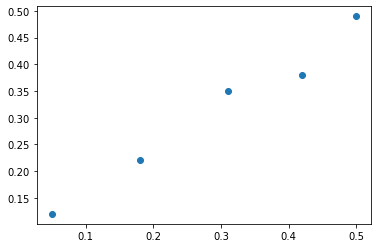

In [21]:
from numpy import array
from matplotlib import pyplot
data = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])
print(data)
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# plot dataset
pyplot.scatter(X, y)
pyplot.show()

[1.00233226]


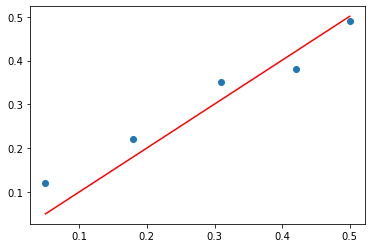

In [22]:
# solve directly
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
data = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# for linear least squares calculating b
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()



#A problem with this approach is the matrix inverse that is
#both computationally expensive and numerically unstable. An alternative approach 
#is to use a matrix decomposition to avoid this operation.


[1.00233226]


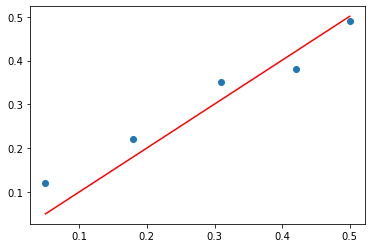

In [23]:
# least squares via QR decomposition

#The QR decomposition approach is more computationally efficient and more 
# numerically stable than calculating the
# normal equation directly, but does not work for all data matrices.




from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49],
])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# QR decomposition
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

In [46]:













# OTHER PROGRAM


import numpy as np
from math import sqrt

A = np.matrix([[10.0,10.0,10.0],
               [20.0,10.0,10.0],
               [20.0,10.0,15.0]])

n = A.shape[0]
n

#A[1, :]

b = np.tile(A, 4)
b


matrix([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
        [20., 10., 10., 20., 10., 10., 20., 10., 10., 20., 10., 10.],
        [20., 10., 15., 20., 10., 15., 20., 10., 15., 20., 10., 15.]])

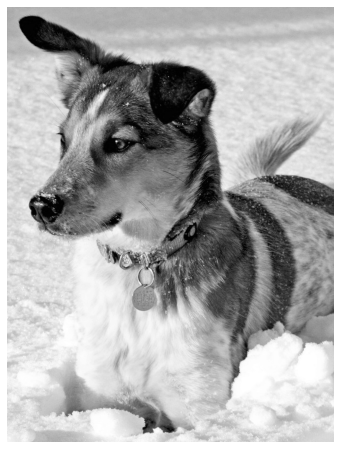

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16,8]

A = imread('dog.jpg')
X = np.mean(A,-1); #converts RGB TO GRAYSCALE

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()





In [5]:
#Singular Value Decomposition and Image compression


import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
 
"""
Singular Value Decomposition
"""
# define a matrix
X = np.array([[3, 3, 2], [2,3,-2]])
print(X)
# perform SVD
U, singular, V_transpose = np.linalg.svd(X)
# print different components
print("U: ",U)
print("\n")
print("Singular array",np.diag(singular))
print("\n")
print("V^{T}",V_transpose)
print("\n")
 


[[ 3  3  2]
 [ 2  3 -2]]
U:  [[ 0.7815437 -0.6238505]
 [ 0.6238505  0.7815437]]


Singular array [[5.54801894 0.        ]
 [0.         2.86696457]]


V^{T} [[ 0.64749817  0.7599438   0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]




C:\Users\ashiv\AppData\Local\Temp/ipykernel_25392/4157795467.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_ast = rgb2gray(ast)


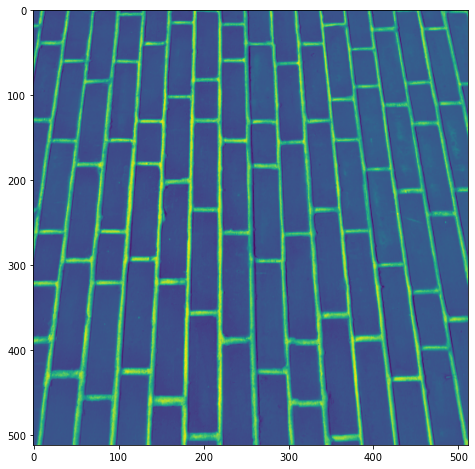

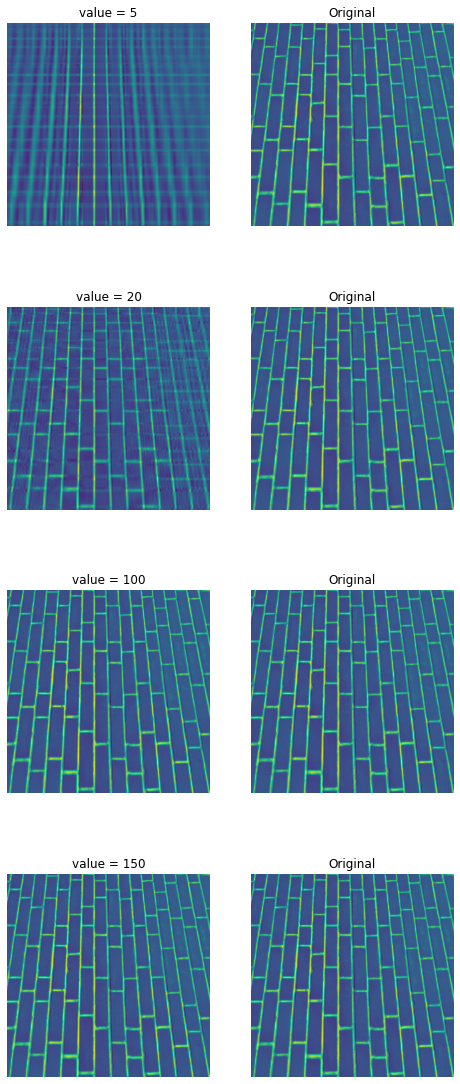

In [72]:
"""
SVD on image compression
"""
 

ast = data.brick()
plt.imshow(ast)
# convert to grayscale
gray_ast = rgb2gray(ast)
 
# calculate the SVD and plot the image
U,S,V_T = np.linalg.svd(gray_ast, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(4, 2, figsize=(8, 20))
 
curr_fig=0
for r in [5, 20, 100, 150]:
  ast_approx =U[:, :r] @  S[0:r, :r] @ V_T[:r, :]
  ax[curr_fig][0].imshow(ast_approx)
  ax[curr_fig][0].set_title("value = "+str(r))
  ax[curr_fig,0].axis('off')
  ax[curr_fig][1].set_title("Original")
  ax[curr_fig][1].imshow(gray_ast)
  ax[curr_fig,1].axis('off')
  curr_fig +=1
  

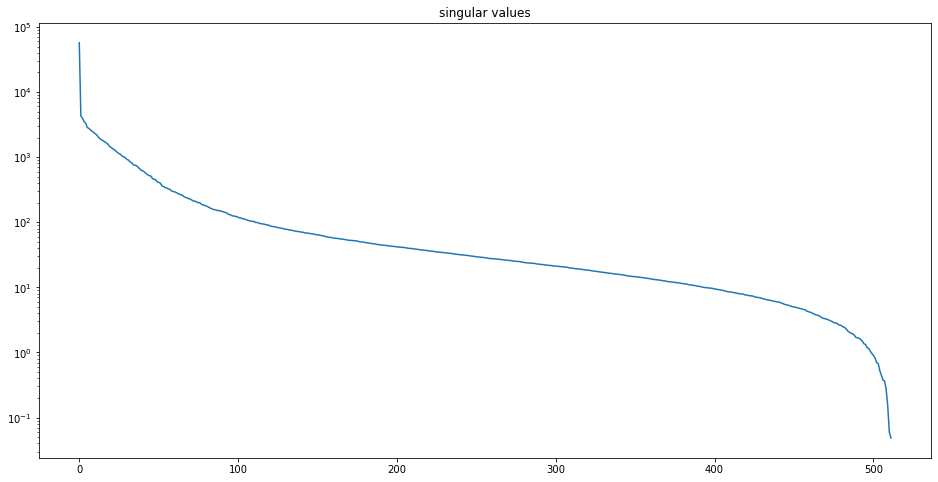

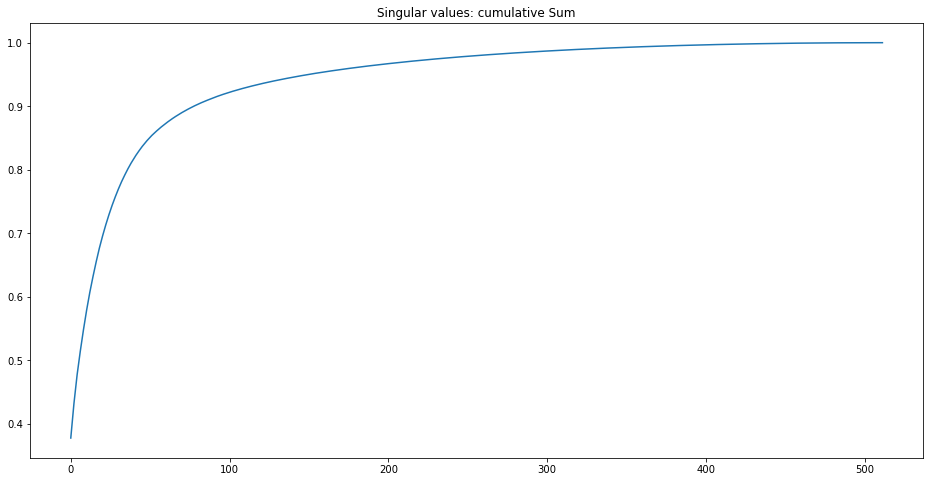

In [73]:
plt.show()

plt.figure(3)
plt.semilogy(np.diag(S))
plt.title('singular values')
plt.show()

plt.figure(4)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular values: cumulative Sum')
plt.show()

In [2]:
#Kabsch algorithm

#We want to find the best rotation and translation that will align the points in dataset A to dataset B. 
# Here, ‘optimal’ or ‘best’ is in terms of least square errors. 

import numpy as np
from math import sqrt

scaling = False 

# Implements Kabsch algorithm - best fit.
# Supports scaling (umeyama)
# Compares well to SA results for the same data.
# Input:
#     Nominal  A Nx3 matrix of points
#     Measured B Nx3 matrix of points
# Returns s,R,t
# s = scale B to A
# R = 3x3 rotation matrix (B to A)
# t = 3x1 translation vector (B to A)
def rigid_transform_3D(A, B, scale):
    assert len(A) == len(B)

    N = A.shape[0];  # total points or total rows in matrix A

    centroid_A = np.mean(A, axis=0) #mean along the colums
    centroid_B = np.mean(B, axis=0)
    
    

    # center the points
    AA = A - np.tile(centroid_A, (N, 1))
    BB = B - np.tile(centroid_B, (N, 1))

    # dot is matrix multiplication for array
    # calculating covariance matrix
    if scale:
        H = np.transpose(BB) * AA / N
    else:
        H = np.transpose(BB) * AA

    #calculating svd on covariance matrix
    
    U, S, Vt = np.linalg.svd(H)

    R = Vt.T * U.T

    # special reflection case
    if np.linalg.det(R) < 0:
        print ("Reflection detected")
        Vt[2, :] *= -1
        R = Vt.T * U.T

    if scale:
        varA = np.var(A, axis=0).sum()
        c = 1 / (1 / varA * np.sum(S))  # scale factor
        t = -R * (centroid_B.T * c) + centroid_A.T
    else:
        c = 1
        t = -R * centroid_B.T + centroid_A.T

    return c, R, t




# Test
A = np.matrix([[10.0,10.0,10.0],
               [20.0,10.0,10.0],
               [20.0,10.0,15.0]])

B = np.matrix([[18.8106,17.6222,12.8169],
               [28.6581,19.3591,12.8173],
               [28.9554, 17.6748, 17.5159]])

n = B.shape[0] #number of rows in matrix

Ttarg = np.matrix([[0.9848, 0.1737,0.0000,-11.5859],
                   [-0.1632,0.9254,0.3420, -7.621],
                   [0.0594,-0.3369,0.9400,2.7755],
                   [0.0000, 0.0000,0.0000,1.0000]])

Tstarg = np.matrix([[0.9848, 0.1737,0.0000,-11.5865],
                   [-0.1632,0.9254,0.3420, -7.621],
                   [0.0594,-0.3369,0.9400,2.7752],
                   [0.0000, 0.0000,0.0000,1.0000]])

# recover the transformation
s, ret_R, ret_t = rigid_transform_3D(A, B, scaling)
#s, ret_R, ret_t = umeyama(A, B)

# Find the error
B2 = (ret_R * B.T) + np.tile(ret_t, (1, n))
B2 = B2.T
err = A - B2
err = np.multiply(err, err)
err = np.sum(err)
rmse = sqrt(err / n)

#convert to 4x4 transform
match_target = np.zeros((4,4))
match_target[:3,:3] = ret_R
match_target[0,3] = ret_t[0]
match_target[1,3] = ret_t[1]
match_target[2,3] = ret_t[2]
match_target[3,3] = 1


In [82]:
print ("Points A")
print (A)
print ("")



print ("Points B")
print(B)
print ("")





Points A
[[10. 10. 10.]
 [20. 10. 10.]
 [20. 10. 15.]]

Points B
[[18.8106 17.6222 12.8169]
 [28.6581 19.3591 12.8173]
 [28.9554 17.6748 17.5159]]



In [3]:
print("Rotation")
print (ret_R)
print ("")

print ("Translation")
print (ret_t)
print ("")

Rotation
[[ 9.84798975e-01  1.73697950e-01  4.18639469e-05]
 [-1.63234699e-01  9.25394020e-01  3.42053127e-01]
 [ 5.93751863e-02 -3.36860402e-01  9.39680614e-01]]

Translation
[[-11.58594476]
 [ -7.6209966 ]
 [  2.7754894 ]]



In [5]:
print ("Scale")
print (s)
print ("")

print ("Homogeneous Transform")
print (match_target)
print ("")





Scale
1

Homogeneous Transform
[[ 9.84798975e-01  1.73697950e-01  4.18639469e-05 -1.15859448e+01]
 [-1.63234699e-01  9.25394020e-01  3.42053127e-01 -7.62099660e+00]
 [ 5.93751863e-02 -3.36860402e-01  9.39680614e-01  2.77548940e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]



array([-0.3368604])

In [86]:
if scaling:
    print ("Total Diff to Tstarg matrix")
    print (np.sum(match_target - Tstarg))
    print ("")
else:
    print ("Total Diff to Ttarg matrix")
    print (np.sum(match_target - Ttarg))
    print ("")

print ("RMSE:", rmse)
print ("If RMSE is near zero, the function is correct!")

Total Diff to Ttarg matrix
-0.0003053169126007102

RMSE: 0.00023740345160482582
If RMSE is near zero, the function is correct!
